# Kaggle One week of Betfair data: 23 sports

A sample of Betfair data available on Kaggle(https://www.kaggle.com/datasets/zygmunt/betfair-sports). All sports except horse racing (for horse racing, there is a twin dataset at https://www.kaggle.com/zygmunt/betfair-horses).


The file has 1306731 data rows. It is 321 MB uncompressed.
Sports IDs:

1 - Soccer
2 - Tennis
3 - Golf
4 - Cricket
5 - Rugby Union
6 - Boxing
8 - Motor Sport
10 - Special Bets
11 - Cycling
1477 - Rugby League
3503 - Darts
3988 - Athletics
4339 - Greyhound Racing
6231 - Financial Bets
6422 - Snooker
6423 - American Football
7511 - Baseball
7522 - Basketball
7524 - Ice Hockey
61420 - Australian Rules
104049 - ? [1 row]
468328 - Handball
998917 - Volleyball
2152880 - Gaelic Games
26420387 - UFC

In [137]:
# do the usaul imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

import seaborn as sns

# set the theme to seaborn
sns.set()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [172]:
# load final dataset from a pickle file
betfair_df = pd.read_pickle("resources/betfair_final.pkl")
betfair_df.info()

betfair_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1011027 entries, 0 to 1043348
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   SPORTS_ID         1011027 non-null  object 
 1   EVENT_ID          1011027 non-null  object 
 2   SETTLED_DATE      1011027 non-null  object 
 3   FULL_DESCRIPTION  1011027 non-null  object 
 4   SCHEDULED_OFF     1011027 non-null  object 
 5   EVENT             1011027 non-null  object 
 6   DT ACTUAL_OFF     1011027 non-null  object 
 7   SELECTION_ID      1011027 non-null  int64  
 8   SELECTION         1011027 non-null  object 
 9   ODDS              1011027 non-null  float64
 10  NUMBER_BETS       1011027 non-null  int64  
 11  VOLUME_MATCHED    1011027 non-null  float64
 12  LATEST_TAKEN      1011027 non-null  object 
 13  FIRST_TAKEN       1011027 non-null  object 
 14  WIN_FLAG          1011027 non-null  int64  
 15  IN_PLAY           1011027 non-null  object 
 16  WIN_A

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Soccer,115279736,04-09-2014 17:07:30,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 15:30,Over/Under 1.5 Goals,04-09-2014 15:32:39,1221386,Over 1.5 Goals,1.35,...,1,IP,1033.4790,0.000,Ukraine,Kyiv,50.450034,30.524136,17.1,0.0
1,Tennis,115288925,04-09-2014 11:50:25,Group A/Brasov Challenger 2014/Second Round Ma...,04-09-2014 10:30,Match Odds,04-09-2014 10:34:32,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.000,Romania,Brasov,45.652510,25.610565,22.1,0.0
2,Soccer,115196118,03-09-2014 15:08:55,U21 Euro Championship/Qualifiers/Fixtures 03 S...,03-09-2014 14:00,Over/Under 1.5 Goals,03-09-2014 14:00:45,1221386,Over 1.5 Goals,2.10,...,1,IP,1313.6340,0.000,Latvia,Riga,56.949398,24.105185,17.4,0.0
3,Soccer,115236324,01-09-2014 19:46:39,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,01-09-2014 19:00,Over/Under 0.5 Goals,01-09-2014 19:01:34,5851483,Over 0.5 Goals,1.10,...,1,IP,1294.1060,0.000,Ireland,Dublin,53.349379,-6.260559,16.1,0.0
4,Soccer,115184779,02-09-2014 18:38:14,Swedish Soccer/Superettan/Fixtures 02 Septembe...,02-09-2014 17:20,Over/Under 1.5 Goals,02-09-2014 17:20:13,1221386,Over 1.5 Goals,1.34,...,1,IP,1210.2612,0.000,Sweden,Stockholm,59.325117,18.071093,15.3,0.0
5,Soccer,115279787,04-09-2014 16:06:00,U21 Euro Championship/Qualifiers/Fixtures 04 S...,04-09-2014 14:15,Over/Under 7.5 Goals,04-09-2014 14:15:00,1485573,Over 7.5 Goals,1.65,...,0,IP,0.0000,12.078,Kazakhstan,Astana,51.128220,71.430668,15.1,0.0
6,Tennis,115280497,05-09-2014 19:52:26,Group A/US Open 2014/Womens Tournament/Semi Fi...,05-09-2014 17:45,Game 06,05-09-2014 18:11:10,2309522,Caroline Wozniacki,1.37,...,1,IP,150.7000,0.000,USA,"Queens, NY",40.713508,-73.828313,27.9,0.0
7,Soccer,115279703,04-09-2014 02:55:01,Brazilian Soccer/Brazilian Cup/Fixtures 04 Sep...,04-09-2014 01:00,Over/Under 6.5 Goals,04-09-2014 00:59:48,2542448,Under 6.5 Goals,1.08,...,1,IP,328.8816,0.000,Brazil,Rio de Janeiro,-22.911014,-43.209373,19.8,0.0
8,Soccer,115137087,01-09-2014 20:21:08,French Soccer/Ligue 2 Orange/Fixtures 01 Septe...,01-09-2014 18:30,Over/Under 2.5 Goals,01-09-2014 18:30:04,47972,Under 2.5 Goals,1.28,...,1,IP,2628.0704,0.000,France,Paris,48.853495,2.348391,18.3,0.0
9,Soccer,115136802,01-09-2014 19:05:09,German Soccer/Bundesliga 2/Fixtures 01 Septemb...,01-09-2014 18:15,Half Time Score,01-09-2014 18:16:55,5,2 - 0,1.34,...,1,IP,134.0000,0.000,Germany,Berlin,52.517037,13.388860,16.8,1.0


<Axes: xlabel='SPORTS_ID'>

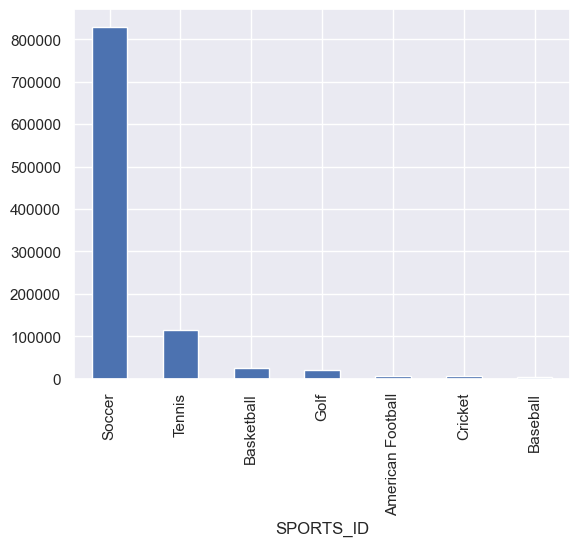

In [51]:
# lets see how many sports/events there are
sports = betfair_df["SPORTS_ID"].value_counts().sort_values(ascending=False)
sports.plot.bar()

Number of Bets:  7935585
Total Money Wagered: 805747319.31
Total Money Won:  810363762.3
Total Money Loss:  837893171.25
Money Difference:  -27529408.95


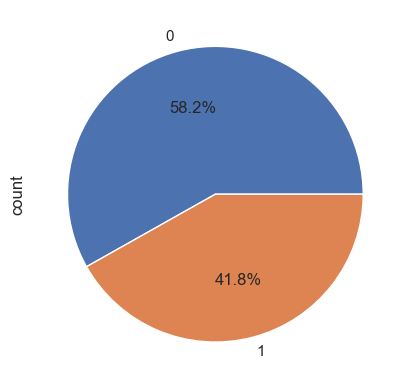

In [5]:
# lets get the number of best and money total
num_of_bets = betfair_df["NUMBER_BETS"].sum()
money_wagered = betfair_df["VOLUME_MATCHED"].sum()
money_won = betfair_df["WIN_AMOUNT"].sum()
money_loss = betfair_df["LOSS_AMOUNT"].sum()

print("Number of Bets: ", num_of_bets)
print("Total Money Wagered:", round(money_wagered, 2))
print("Total Money Won: ", round(money_won, 2))
print("Total Money Loss: ", round(money_loss, 2))
print("Money Difference: ", round(money_won - money_loss, 2))

# lets see the winning and lossing bets
betfair_df["WIN_FLAG"].value_counts().plot.pie(autopct='%1.1f%%');

Text(0, 0.5, 'Winning Percentage (%)')

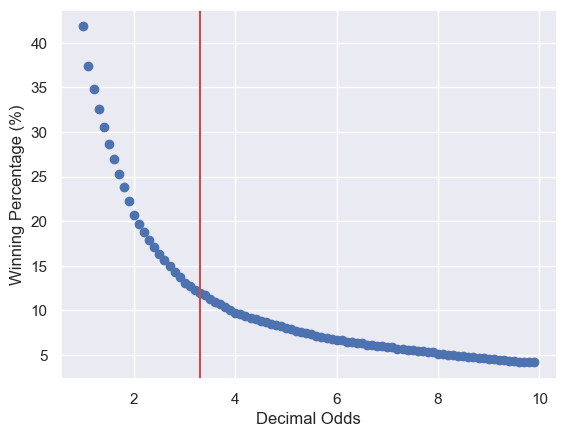

In [47]:
# create scatter plot showing odds vs winning percentage
odds = np.arange(1.0,10.0, 0.1)
per_list = []

for i in odds:
    underdogs =  betfair_df.loc[betfair_df["ODDS"] > i, ["ODDS", "WIN_FLAG"]]
    wins_df = underdogs.groupby("WIN_FLAG").count()
    losses = wins_df.iloc[0,0]
    wins = wins_df.iloc[1,0]
    per = (wins/(wins + losses)) *100
    per_list.append(per)
    #print(i, losses, wins, per)
   
plt.scatter(x=odds, y=per_list)
plt.axvline(x = 3.3, color = 'r', label = 'Underdog Point')
plt.xlabel("Decimal Odds"),
plt.ylabel("Winning Percentage (%)")

In [38]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] > 3.3, ["WIN_AMOUNT", "LOSS_AMOUNT"]]
ps = underdogs.mean()
print(ps.iloc[0])
print(ps.iloc[1])

92.49484435190705
1270.4701811793234


Text(0, 0.5, 'Average wins/loss')

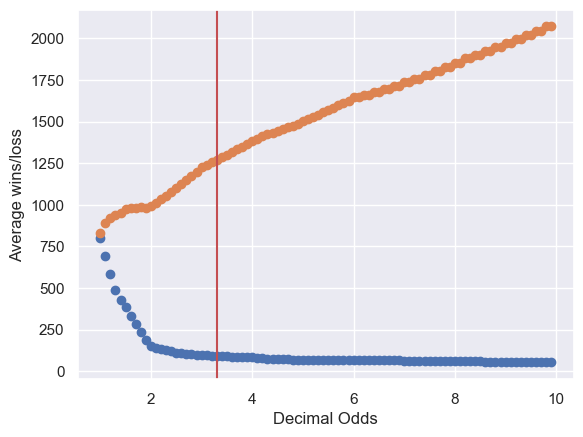

In [45]:
odds = np.arange(1.0,10.0, 0.1)
avg_win_list = []
avg_loss_list = []

for i in odds:
    underdogs =  betfair_df.loc[betfair_df["ODDS"] > i, ["WIN_AMOUNT", "LOSS_AMOUNT"]]
    wins_ps = underdogs.mean()
    avg_wins = wins_ps.iloc[0]
    avg_loss = wins_ps.iloc[1]
    avg_win_list.append(avg_wins)
    avg_loss_list.append(avg_loss)
    
plt.scatter(x=odds, y=avg_win_list)
plt.scatter(x=odds, y=avg_loss_list)
plt.axvline(x = 3.3, color = 'r', label = 'Underdog Point')
plt.xlabel("Decimal Odds"),
plt.ylabel("Average wins/loss")

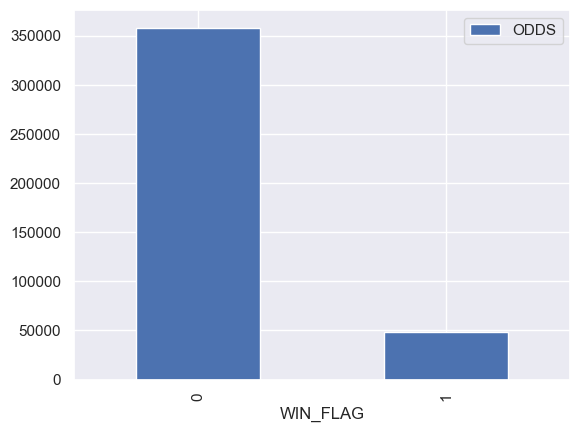

In [16]:
underdogs =  betfair_df.loc[betfair_df["ODDS"] > 3.3, ["ODDS", "WIN_FLAG"]]
underdogs_counts = underdogs.groupby("WIN_FLAG").count()
underdogs_counts.plot.bar();

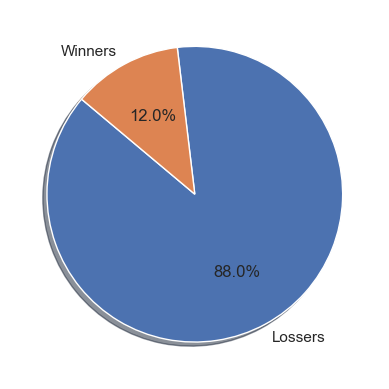

In [14]:
plt.pie([underdogs_counts.iloc[0,0], underdogs_counts.iloc[1,0]], labels=["Lossers", "Winners"],
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

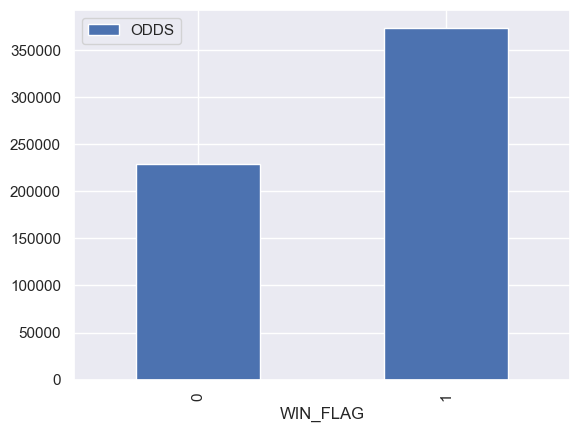

In [17]:
favorites =  betfair_df.loc[betfair_df["ODDS"] <= 3.3, ["ODDS", "WIN_FLAG"]]
favorites.groupby("WIN_FLAG").count().plot.bar();

<Axes: xlabel='SPORTS_ID'>

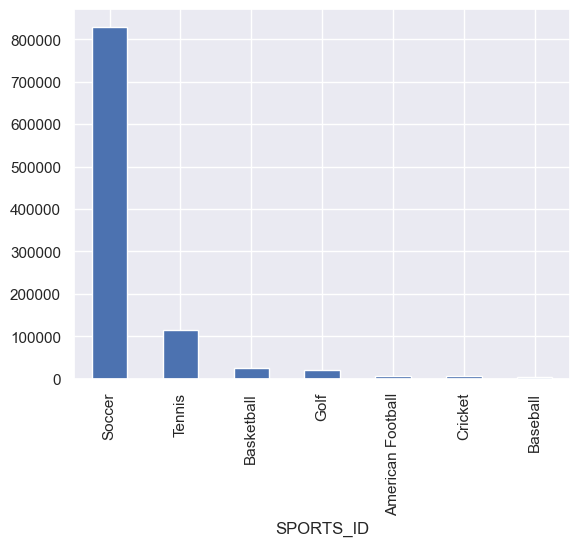

In [63]:
# group by country
country_df = betfair_df.groupby("COUNTRY")
country_df[["WIN_FLAG", "WIN_AMOUNT", "LOSS_AMOUNT", "LATITUDE", "LONGITUDE"]].mean()

,WIN_AMOUNT,LOSS_AMOUNT,WIN_FLAG,LATITUDE,LONGITUDE
COUNTRY,,,,,
Costa Rica,74.219300,93.011812,0.425781,9.932543,-84.079578
Algeria,31.205741,54.261323,0.556122,36.775361,3.060188
Argentina,190.544412,313.355819,0.395390,-34.680832,-58.323998
Armenia,108.602765,91.318485,0.479444,40.177711,44.512623
Australia,247.887112,17.276533,0.786667,-28.000290,153.430880
...,...,...,...,...,...
Uruguay,119.917191,156.823051,0.425766,-34.905892,-56.191310
Uzbekistan,369.084610,259.292776,0.475436,41.312336,69.278708
Vietnam,133.795752,165.802394,0.398446,21.028321,105.854022


In [108]:
# Define a function to create Linear Regression plots
def show_reg_plot(x_values, y_values, xlabel, ylabel, annot_x, annot_y):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The R-squared value is: {rvalue**2}")
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values,"r--")
    plt.annotate(line_eq,(annot_x,annot_y), fontsize=15, color="red")

    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()

The R-squared value is: 0.32149513727271384


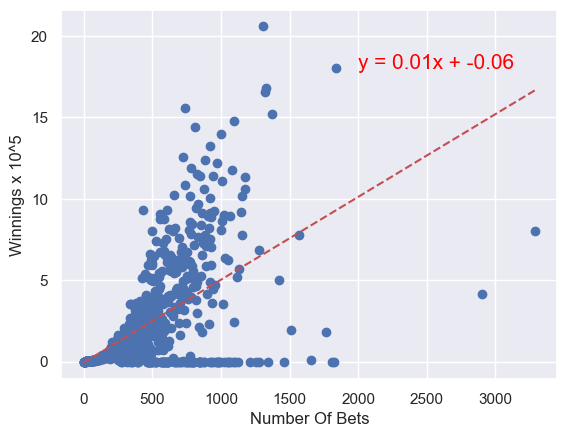

In [112]:
# number of bets vs winnings with linear plot
bets_gb = betfair_df[["NUMBER_BETS", "WIN_AMOUNT", "LOSS_AMOUNT"]].groupby(["NUMBER_BETS"])
bets_df = bets_gb.mean()

x_values = bets_df.index
y_values = bets_df["WIN_AMOUNT"]/1e5

show_reg_plot(x_values, y_values, "Number Of Bets", "Winnings x 10^5", 2000, 18)

The R-squared value is: 0.15855905364976916


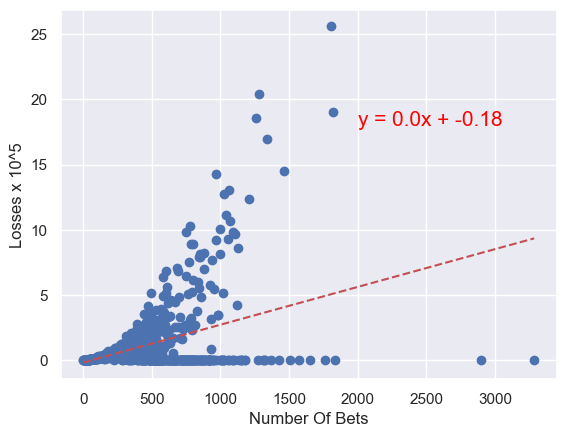

In [113]:
x_values = bets_df.index
y_values = bets_df["LOSS_AMOUNT"]/1e5

show_reg_plot(x_values, y_values, "Number Of Bets", "Losses x 10^5", 2000, 18)

In [118]:
# let's do some anova sports vs bet total and win loss amount
games_df = pd.read_csv("output/sports_location.csv")
games_df.head(5)

,SPORTS_ID,FULL_DESCRIPTION,NUMBER_BETS,VOLUME_MATCHED,WIN_AMOUNT,LOSS_AMOUNT,SETTLED_DATE,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Golf,Group B/BMW Championship 2014,149070,4712927.68,5.190166e+06,8.088417e+07,5/9/14 17:40,USA,"Cherry Hills Village, CO",39.641654,-104.959425,16.6,0
1,Golf,Group B/BMW Championship 2014/Tournament Match...,152,3633.26,6.218803e+03,5.955442e+02,7/9/14 22:20,USA,"Cherry Hills Village, CO",39.641654,-104.959425,27.4,0
2,Golf,Group B/Chiquita Classic 2014,1321,6892.82,4.048800e+02,6.530881e+05,7/9/14 20:11,USA,"Davidson, NC",35.499261,-80.848522,29.2,0
3,Golf,Group B/Deutsche Bank Championship 2014,166663,4672132.07,3.546043e+06,1.027464e+08,1/9/14 21:53,USA,"Norton, Massachusetts",41.966767,-71.186994,28.3,0
4,Golf,Group B/Deutsche Bank Championship 2014/Tourna...,415,10449.26,1.569752e+04,3.782393e+03,1/9/14 22:08,USA,"Norton, Massachusetts",41.966767,-71.186994,28.3,0


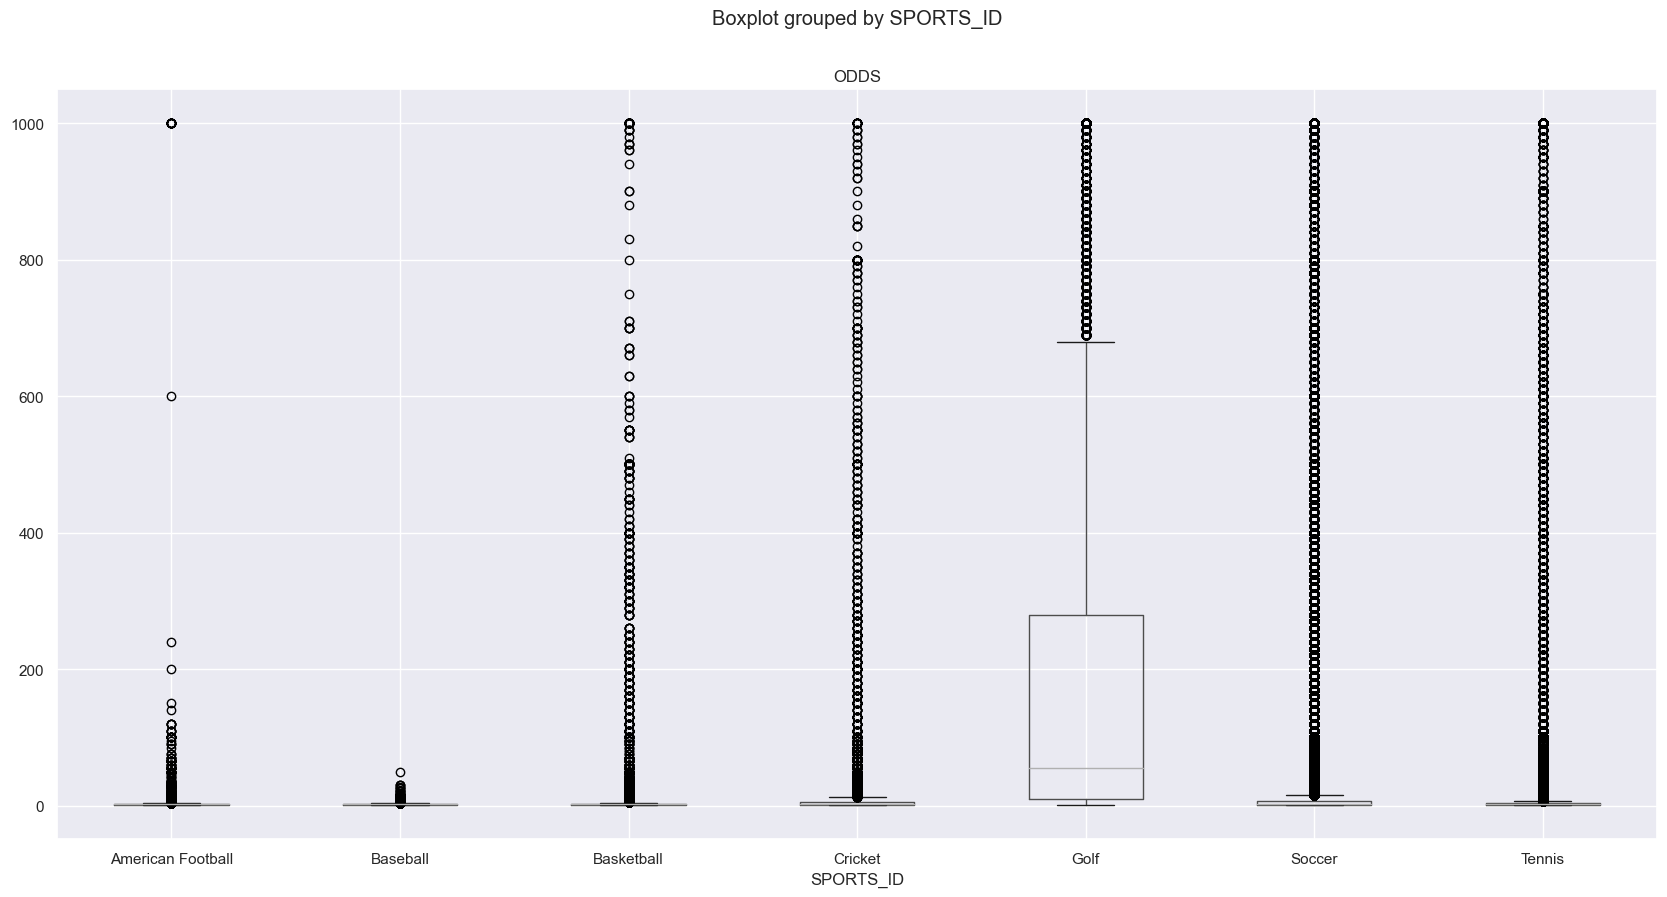

In [149]:
# lets do box plot for odds
betfair_df.boxplot("ODDS", by="SPORTS_ID", figsize=(20, 10));

<Axes: title={'center': 'NUMBER_BETS'}, xlabel='SPORTS_ID'>

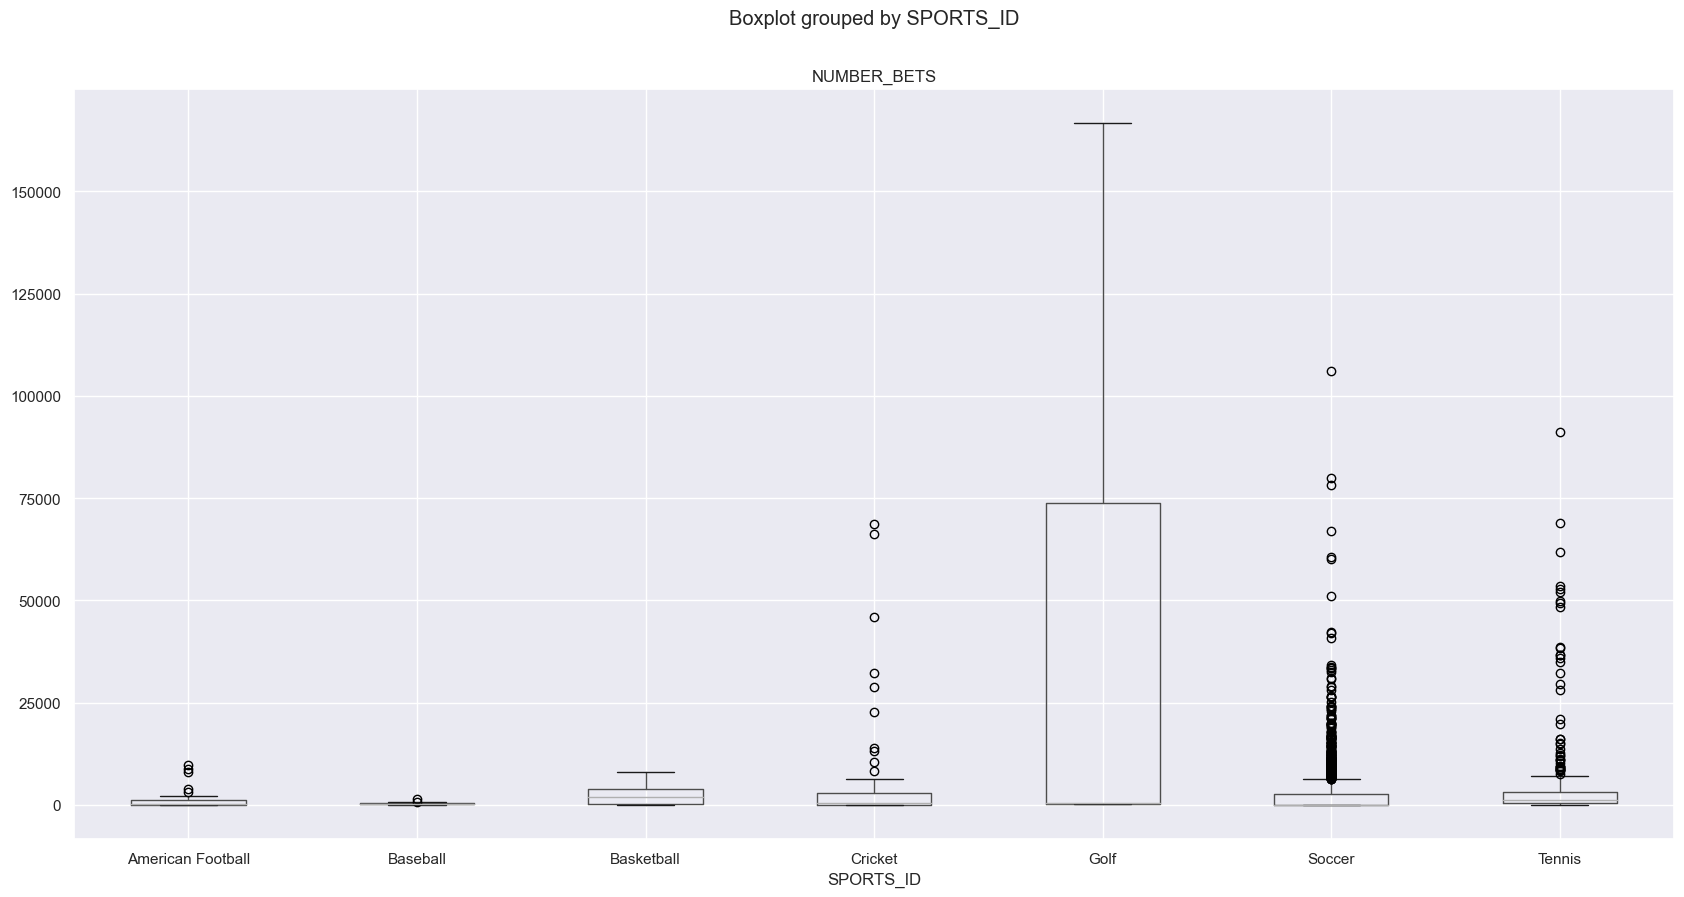

In [119]:
# lets do a box plot vs bets count
games_df.boxplot("NUMBER_BETS", by="SPORTS_ID", figsize=(20, 10))

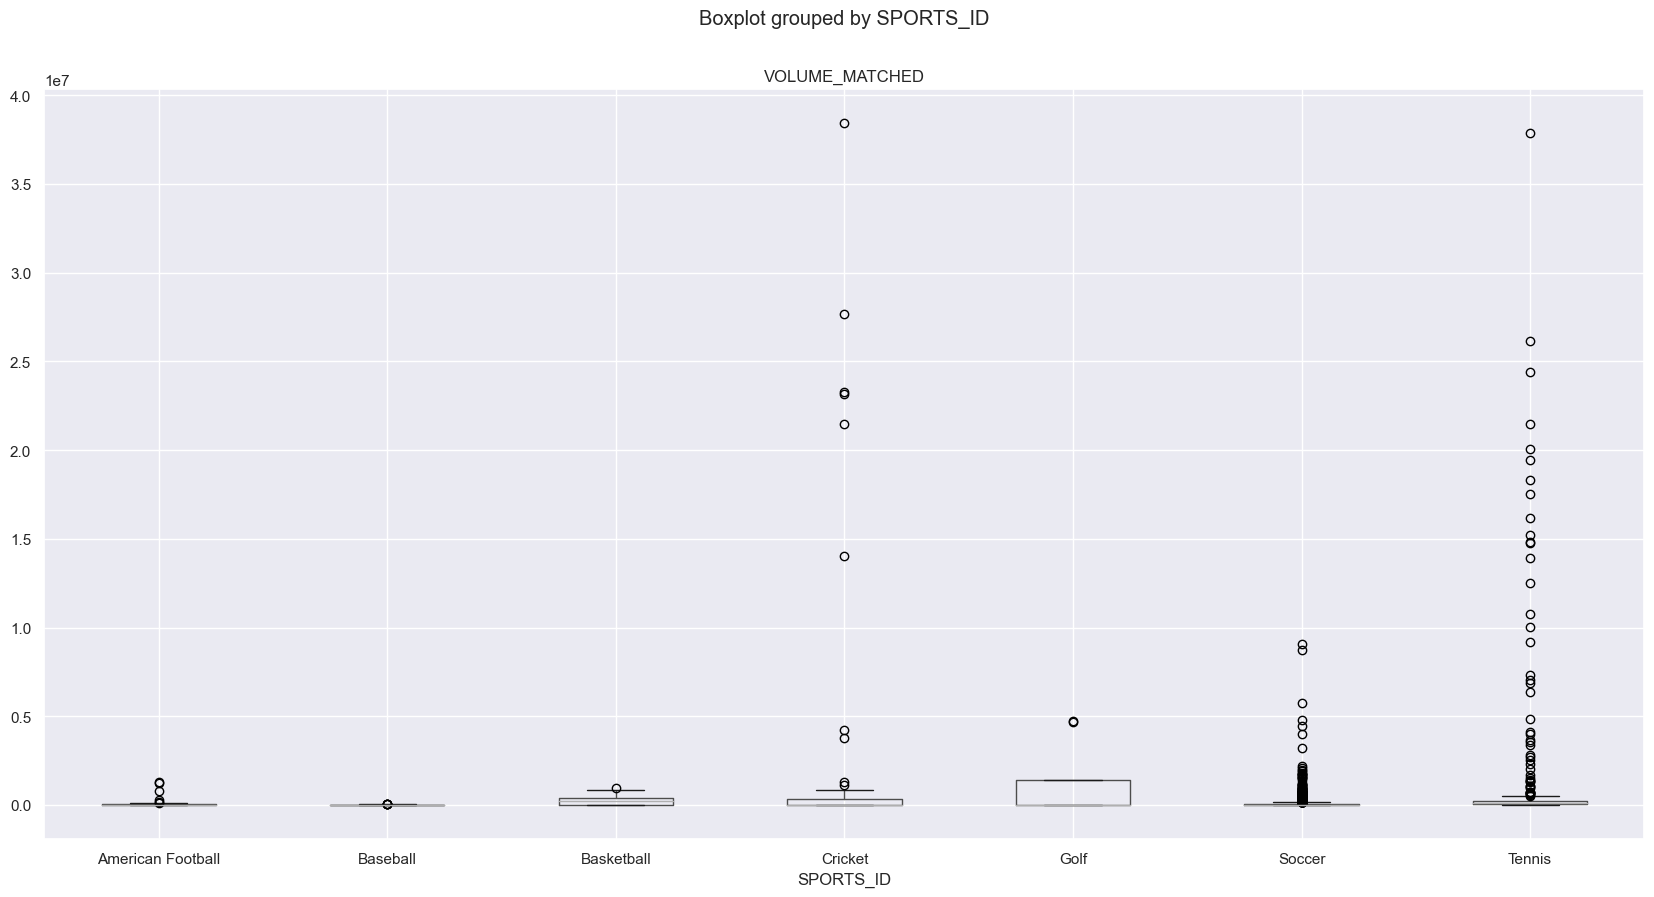

In [123]:
games_df.boxplot("VOLUME_MATCHED", by="SPORTS_ID", figsize=(20, 10));

<Axes: title={'center': 'WIN_AMOUNT'}, xlabel='SPORTS_ID'>

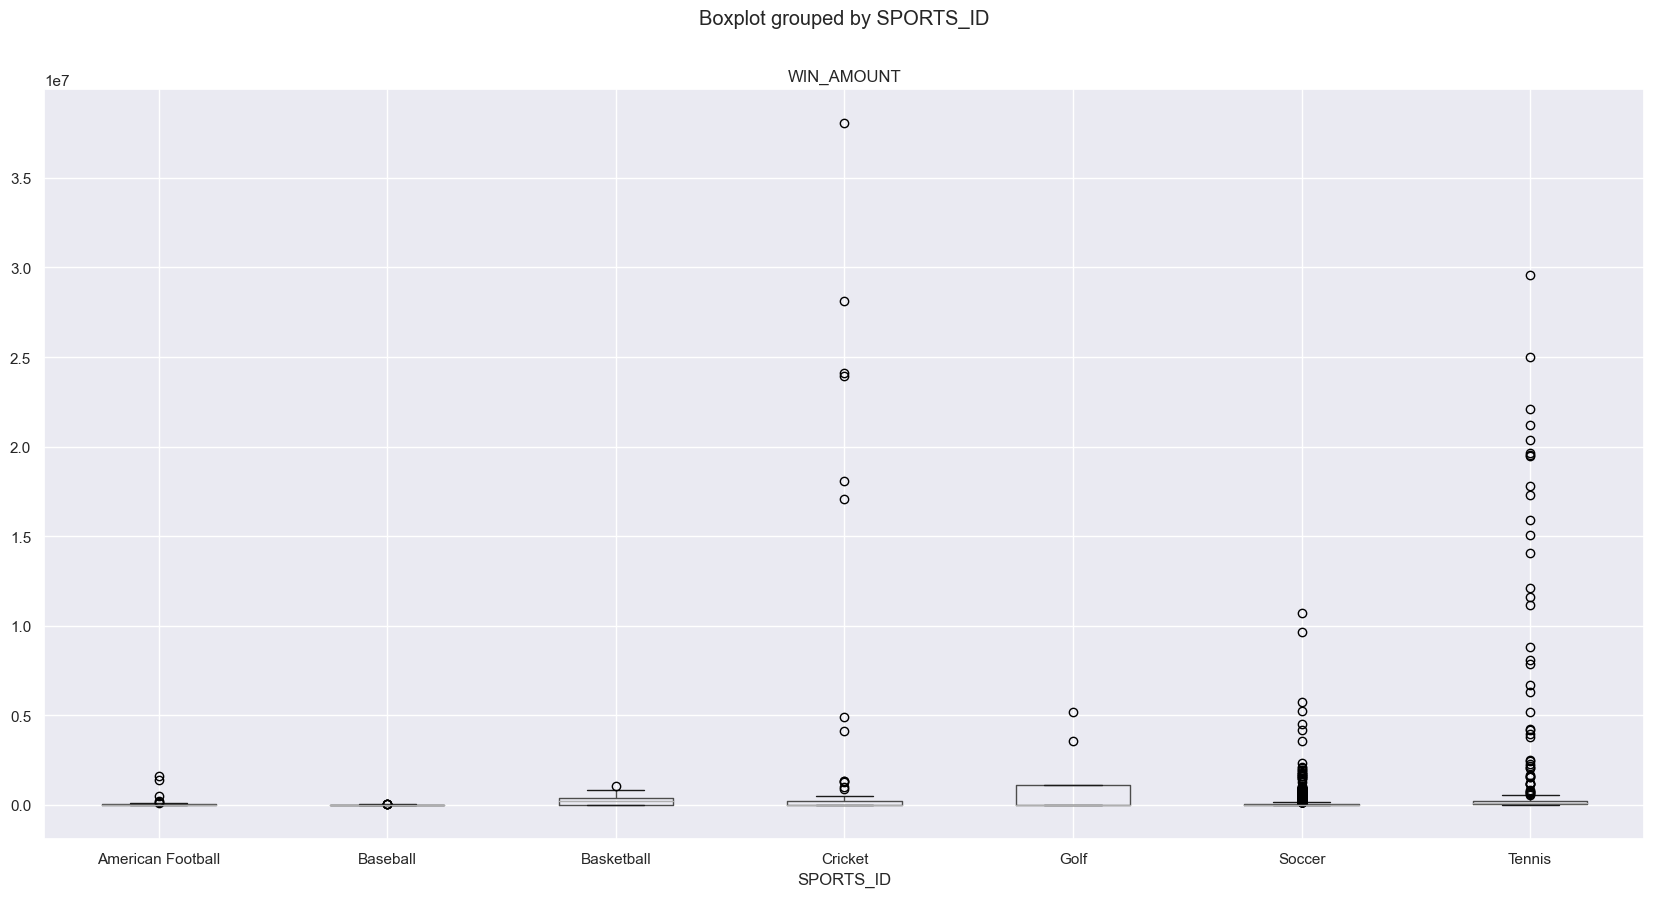

In [120]:
games_df.boxplot("WIN_AMOUNT", by="SPORTS_ID", figsize=(20, 10));

<Axes: title={'center': 'LOSS_AMOUNT'}, xlabel='SPORTS_ID'>

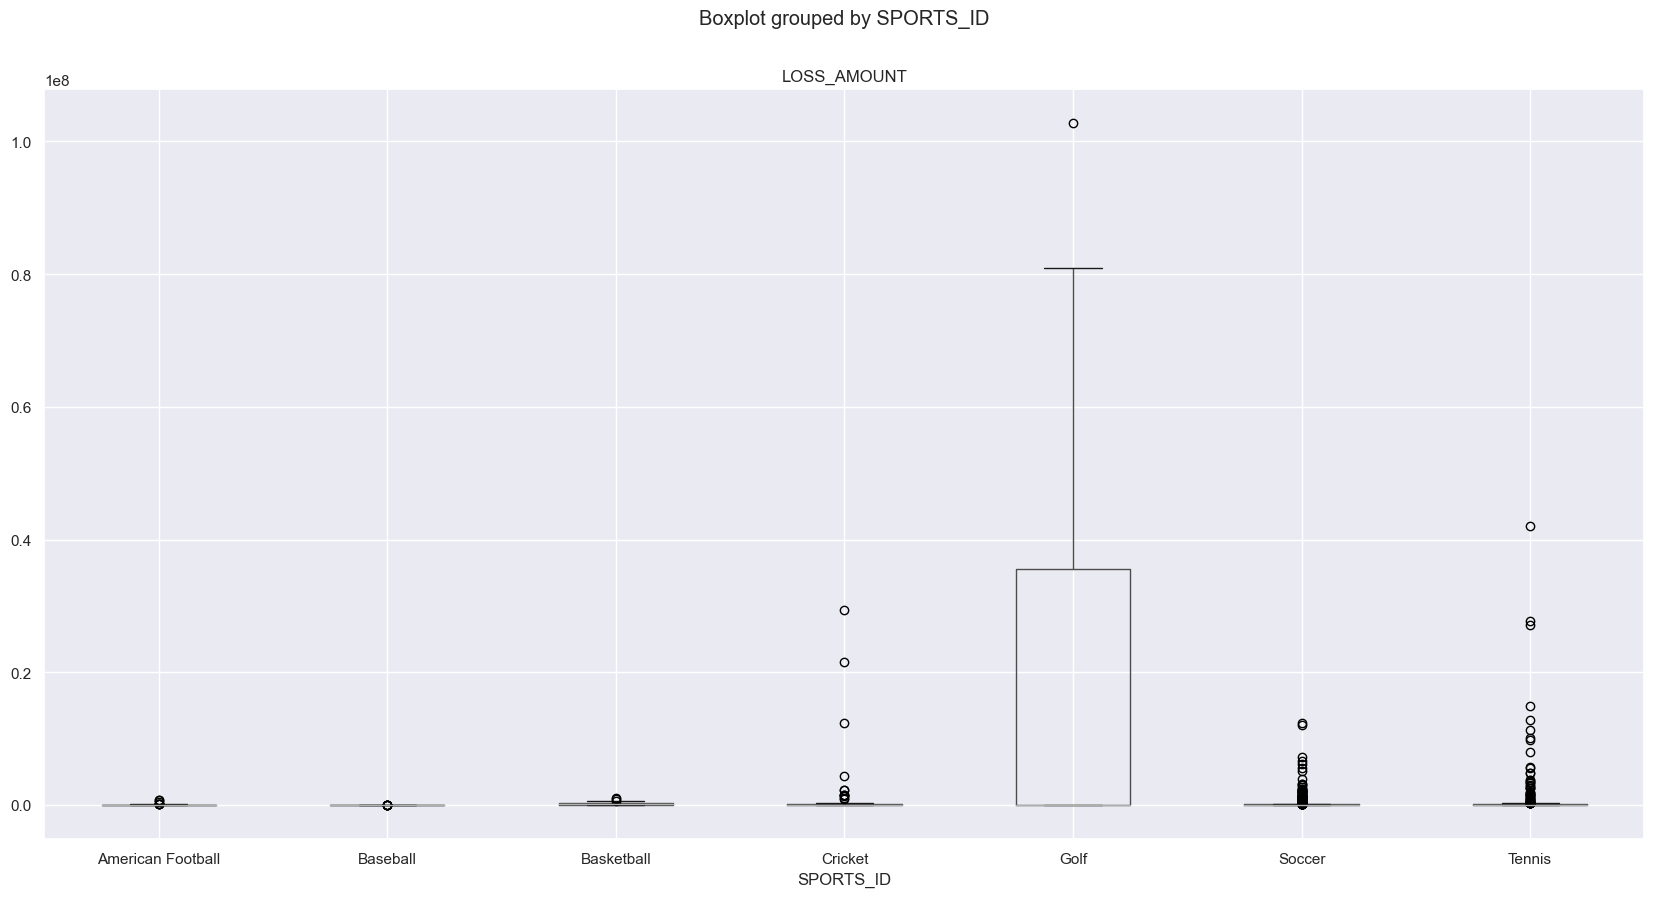

In [121]:
games_df.boxplot("LOSS_AMOUNT", by="SPORTS_ID", figsize=(20, 10))

In [153]:
# function to conduct anova all all this catergories
sports = games_df["SPORTS_ID"].value_counts().index.tolist()
columns = ["NUMBER_BETS", "VOLUME_MATCHED", "WIN_AMOUNT", "LOSS_AMOUNT", "ODDS"]

for column in columns:
    df_group = []
    print("Running ANOVA on:", column)
    for sport in sports:
        if column == "ODDS":
            df = betfair_df.loc[betfair_df["SPORTS_ID"] == sport, [column]]
        else:
            df = games_df.loc[games_df["SPORTS_ID"] == sport, [column]]
        
        df_group.append(df)
    
    # run the anova analysis
    results = stats.f_oneway(*df_group)
    print("Results for", column, results,"\n")

Running ANOVA on: NUMBER_BETS
Results for NUMBER_BETS F_onewayResult(statistic=array([42.4758127]), pvalue=array([9.94426098e-50])) 

Running ANOVA on: VOLUME_MATCHED
Results for VOLUME_MATCHED F_onewayResult(statistic=array([28.59123361]), pvalue=array([2.67263994e-33])) 

Running ANOVA on: WIN_AMOUNT
Results for WIN_AMOUNT F_onewayResult(statistic=array([29.83726327]), pvalue=array([8.68010637e-35])) 

Running ANOVA on: LOSS_AMOUNT
Results for LOSS_AMOUNT F_onewayResult(statistic=array([124.4810691]), pvalue=array([5.53836256e-139])) 

Running ANOVA on: ODDS
Results for ODDS F_onewayResult(statistic=array([10119.18267721]), pvalue=array([0.])) 



In [ ]:
pd.set_option('display.max_rows', 500)
print(betfair_df["EVENT"].value_counts().head(300))

In [173]:
# funtion to consolidate the event categories (>1000) into much less categories
def clean_event(event):
    if "Match Odds" in event:
        return "Match Odds"
    elif "Correct Score" in event:
        return "Correct Score"
    elif "Over/Under" in event:
        return "Over/Under"
    elif "Half Time" in event:
        return "Half Time"
    elif "First Half" in event:
        return "First Half"
    elif "Winner" in event:
        return "Winner"
    elif "Moneyline" in event:
        return "Moneyline"
    elif "Set " in event:
        return "Set Betting"
    elif "Goal" in event:
        return "Goal"
    elif "Game" in event:
        return "Game"
    elif "U/O" in event:
        return "Over/Under"
    else:
        return "Other"

betfair_df["EVENT"] = betfair_df["EVENT"].apply(clean_event)

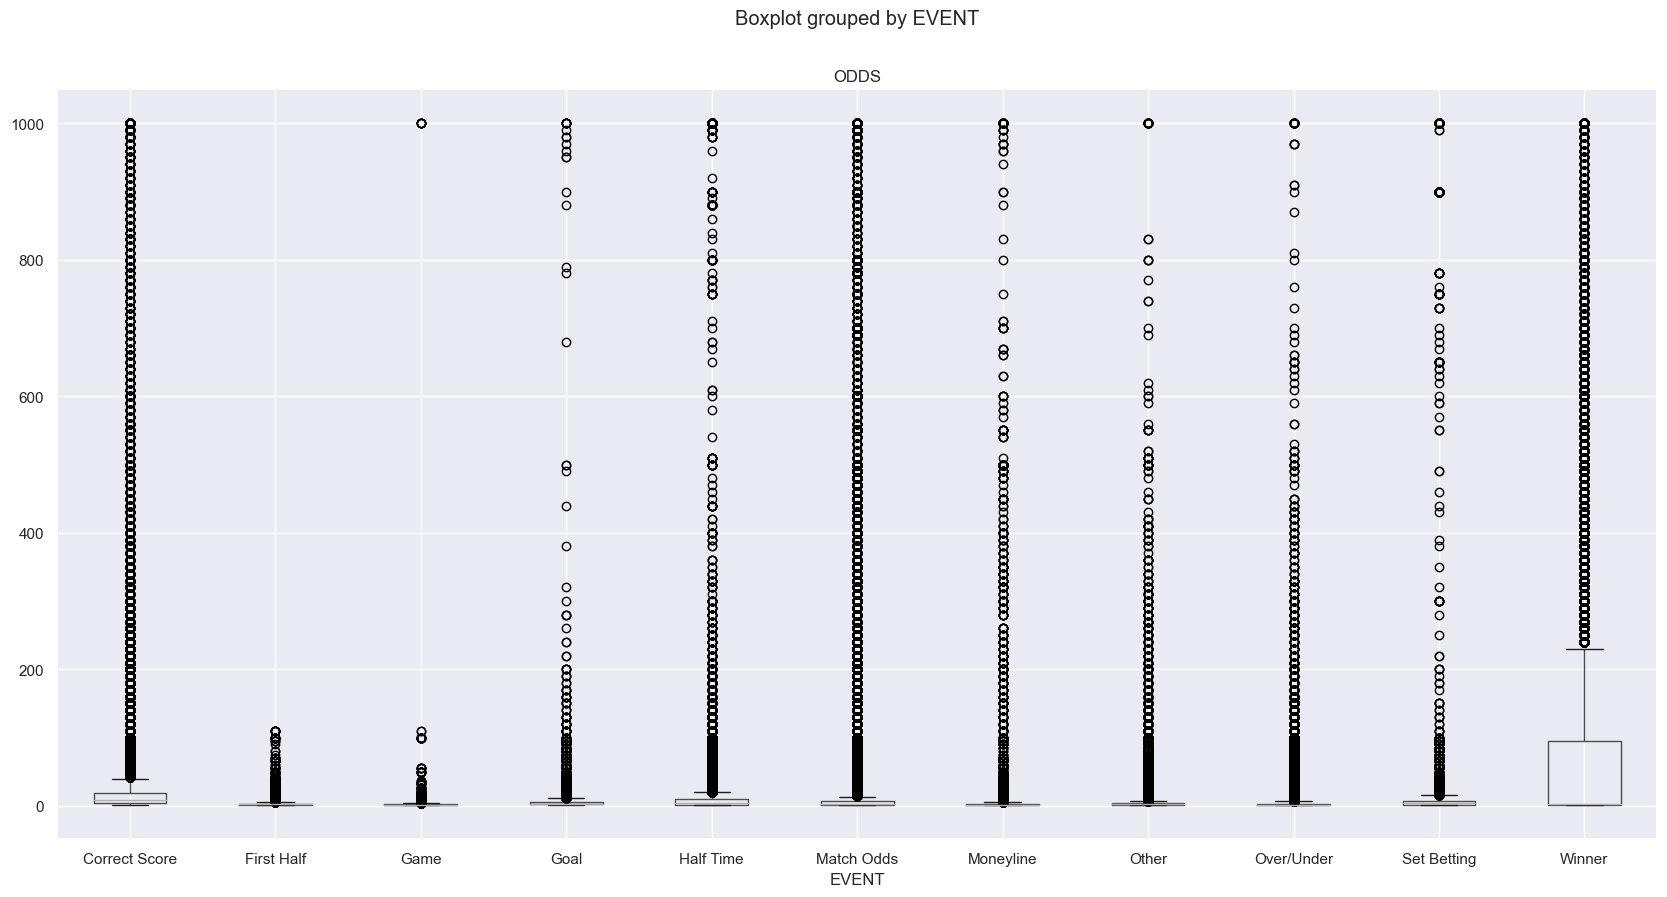

In [175]:
betfair_df.boxplot("ODDS", by="EVENT", figsize=(20, 10));

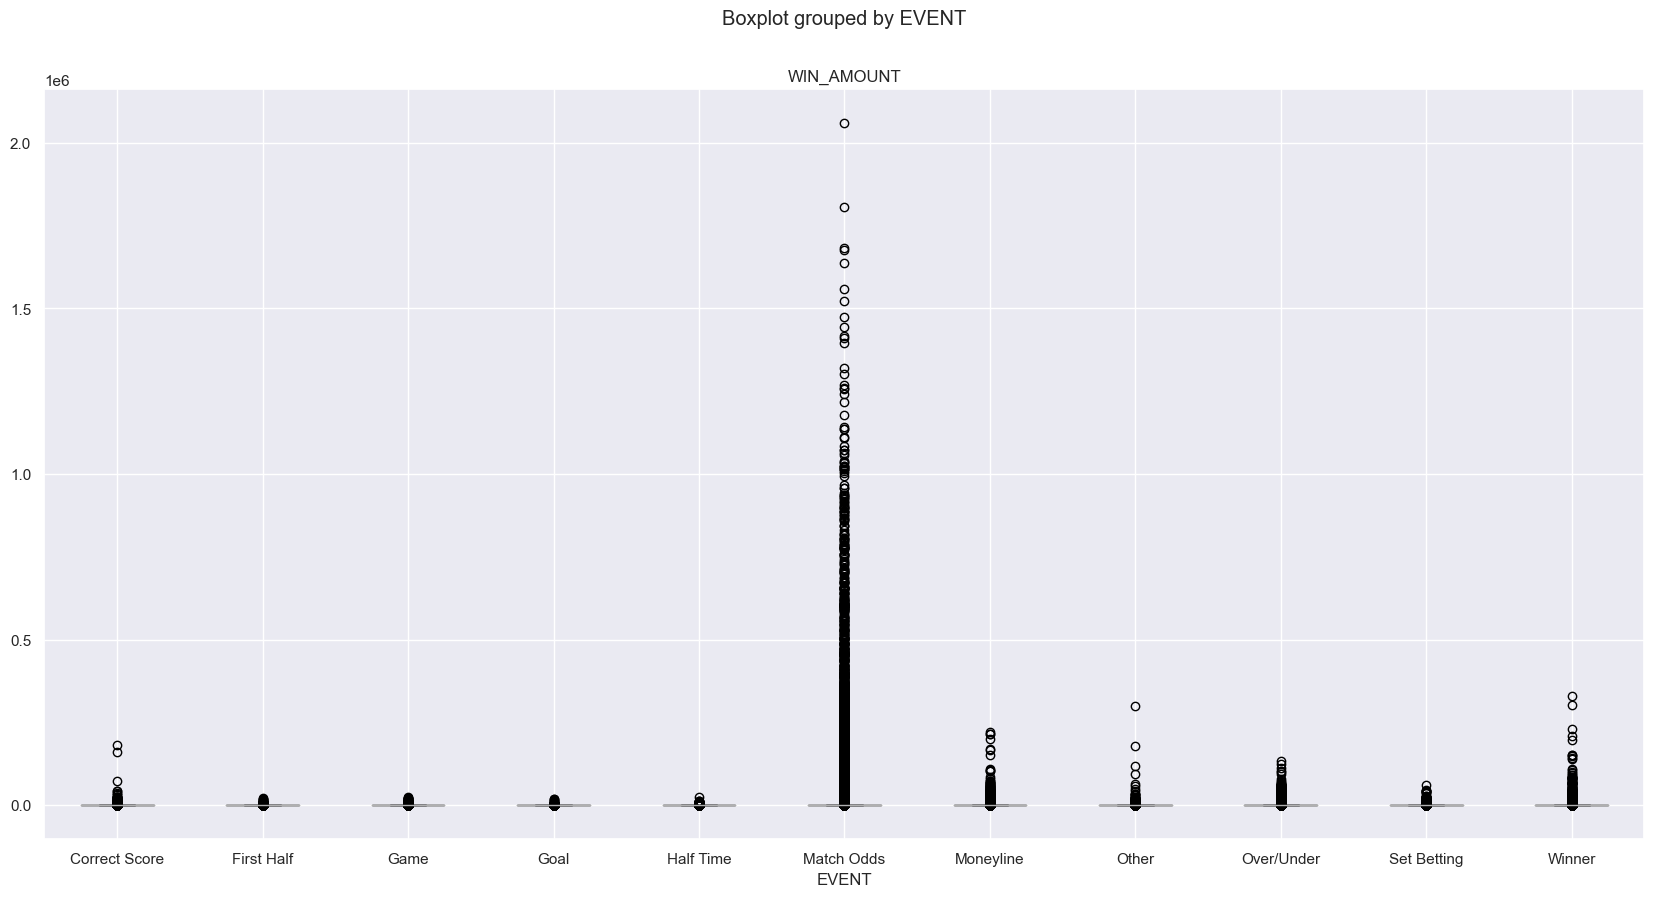

In [176]:
betfair_df.boxplot("WIN_AMOUNT", by="EVENT", figsize=(20, 10));

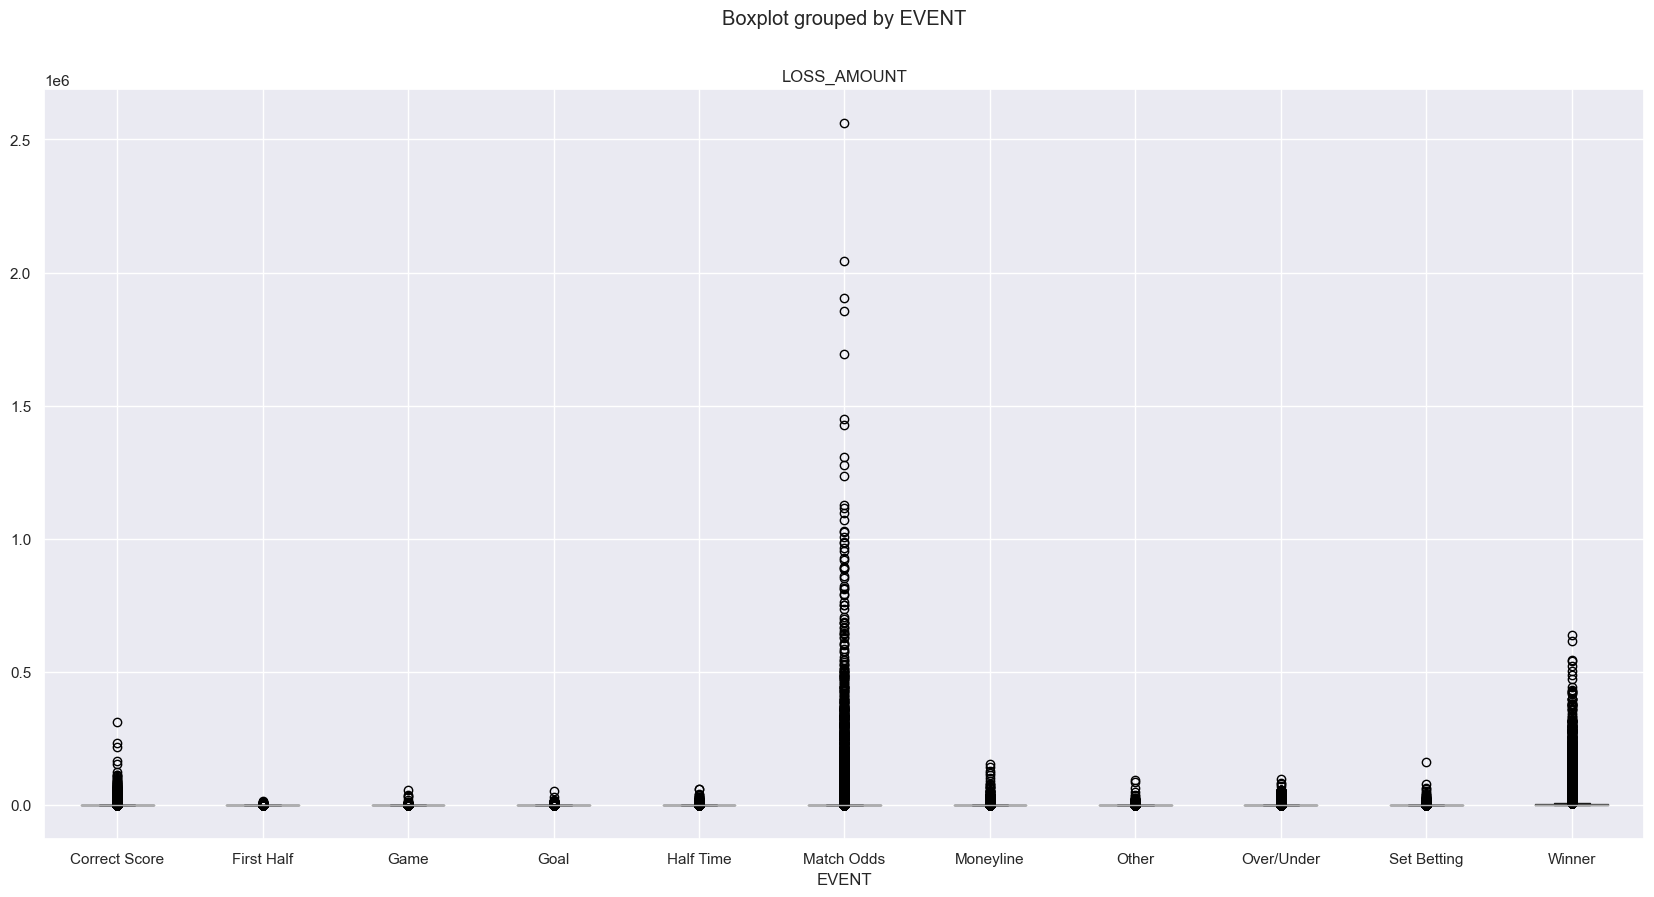

In [177]:
betfair_df.boxplot("LOSS_AMOUNT", by="EVENT", figsize=(20, 10));

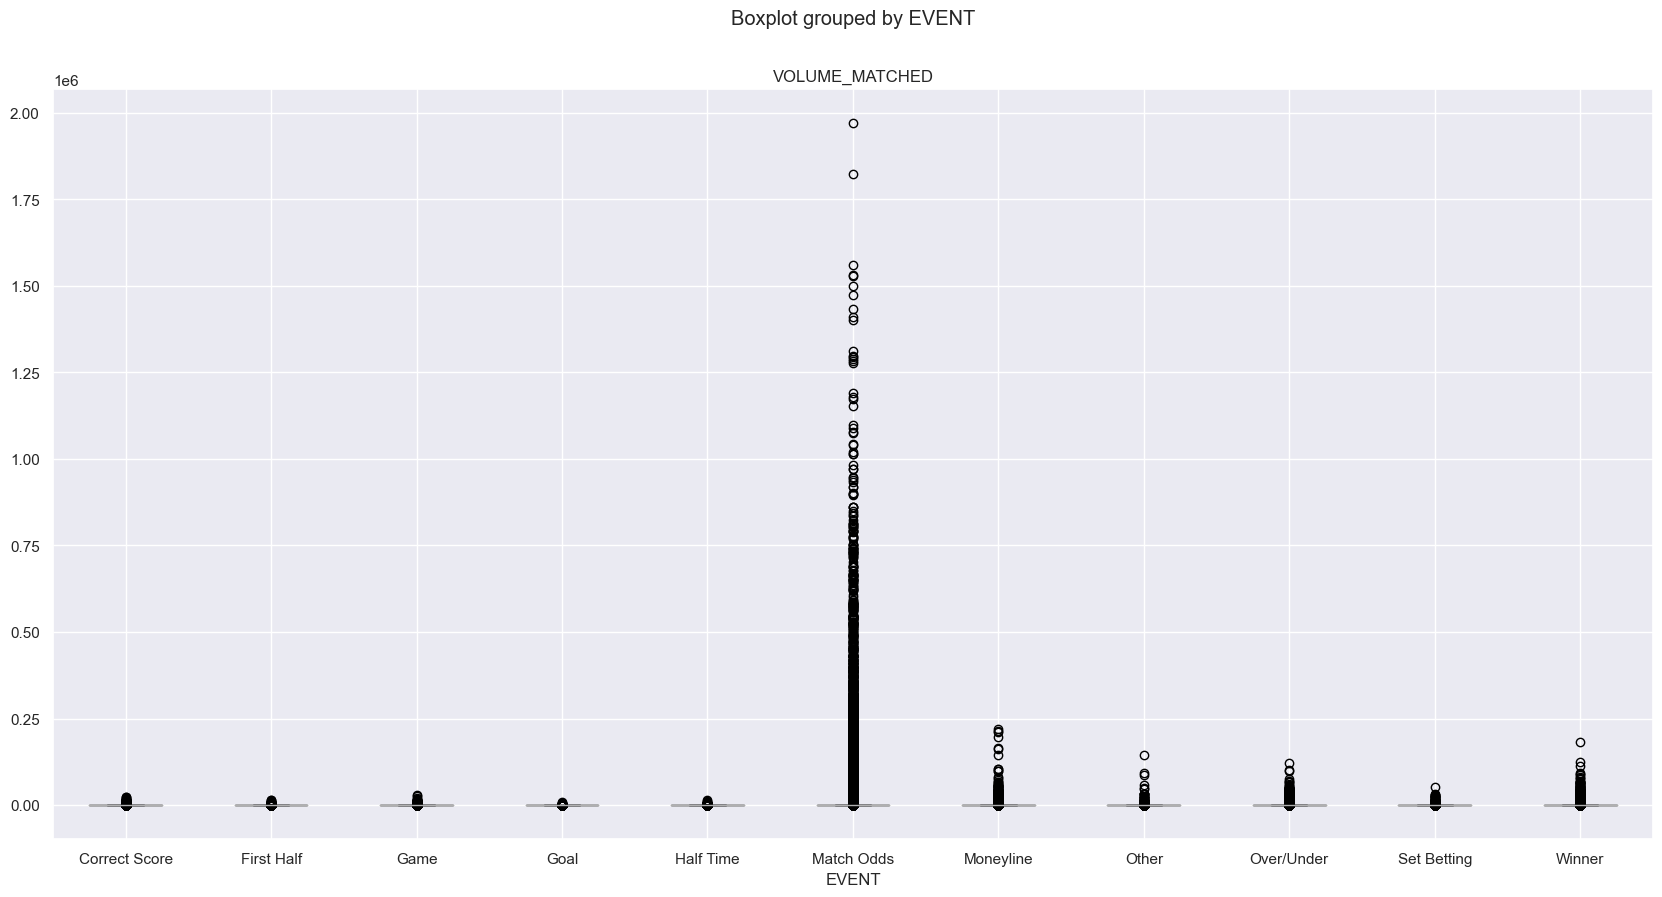

In [178]:
betfair_df.boxplot("VOLUME_MATCHED", by="EVENT", figsize=(20, 10));

<Axes: xlabel='SPORTS_ID'>

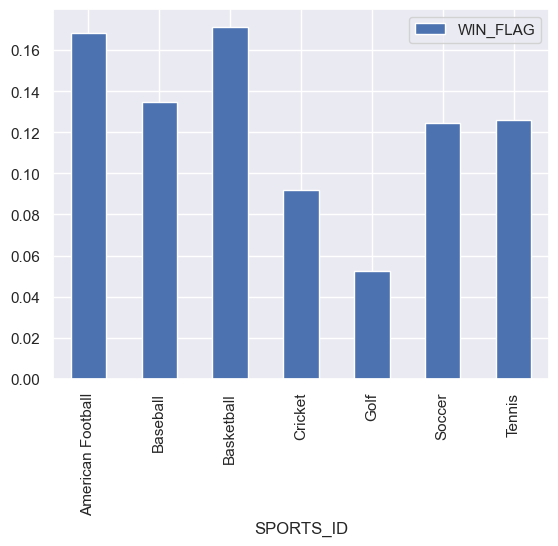

In [190]:
underdogs_df = betfair_df.loc[betfair_df["ODDS"] >= 3.3, ]
underdogs_df = underdogs_df.groupby("SPORTS_ID")
usport_df = underdogs_df[["WIN_FLAG"]].mean()
usport_df.plot.bar()

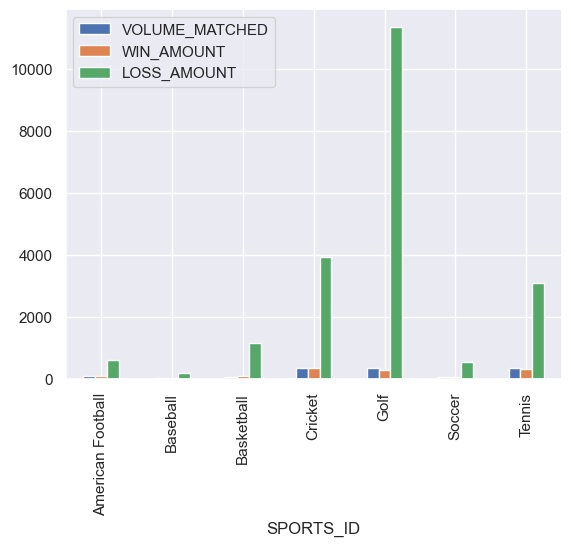

In [193]:
usport_df = underdogs_df[["VOLUME_MATCHED", "WIN_AMOUNT", "LOSS_AMOUNT"]].mean()
usport_df.plot.bar();

In [196]:
# ANOVA analysis
underdogs_df = betfair_df.loc[betfair_df["ODDS"] >= 3.3, ]
df_group = []

for sport in sports:
    df = underdogs_df.loc[underdogs_df["SPORTS_ID"] == sport, "WIN_FLAG"]
    df_group.append(df)
    
# run the anova analysis
results = stats.f_oneway(*df_group)
print("Results for Underdog WIN FLAG", results,"\n")

Results for WIN FLAG F_onewayResult(statistic=172.97899458342363, pvalue=1.098768415338103e-220) 



<Axes: xlabel='SPORTS_ID'>

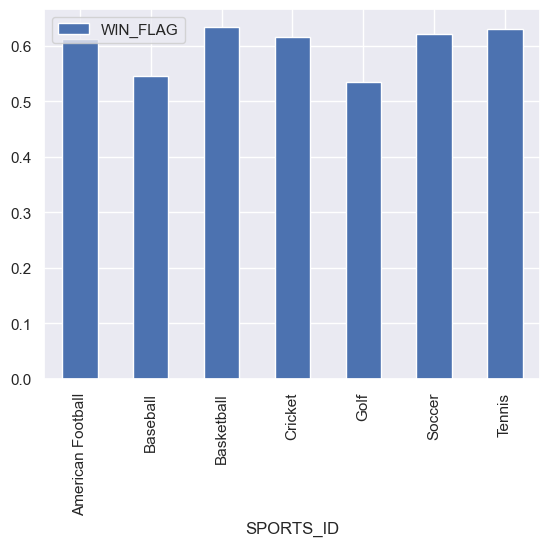

In [194]:
favorites_df = betfair_df.loc[betfair_df["ODDS"] < 3.3, ]
favorites_df = favorites_df.groupby("SPORTS_ID")
fsport_df = favorites_df[["WIN_FLAG"]].mean()
fsport_df.plot.bar()

<Axes: xlabel='SPORTS_ID'>

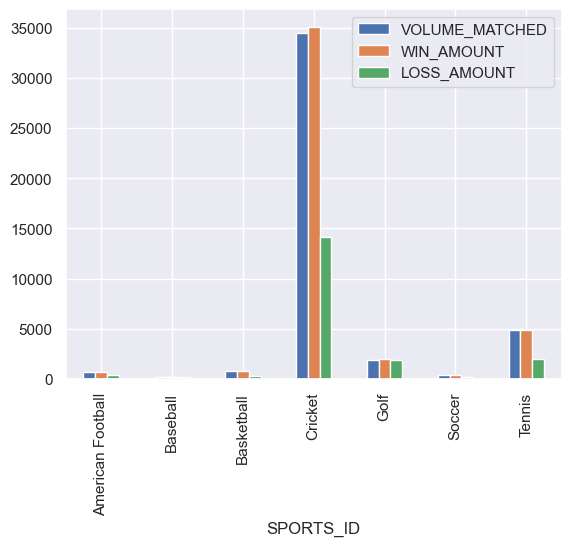

In [195]:
fsport_df = favorites_df[["VOLUME_MATCHED", "WIN_AMOUNT", "LOSS_AMOUNT"]].mean()
fsport_df.plot.bar()

In [204]:
# ANOVA analysis
favorites_df = betfair_df.loc[betfair_df["ODDS"] < 3.3, ]
df_group = []

for sport in sports:
    df = favorites_df.loc[favorites_df["SPORTS_ID"] == sport, "WIN_FLAG"]
    df_group.append(df)
    
# run the anova analysis
results = stats.f_oneway(df_group[4], df_group[5])
print("Results for Favorites WIN FLAG", results,"\n")

Results for Favorites WIN FLAG F_onewayResult(statistic=0.1616665773362363, pvalue=0.6876345110942652) 

